# 07-2 심층 신경망
인공 신경망에 층을 여러 개 추가하여 패션 MNIST 데이터셋을 분류하면서 케라스로 심층 신경망을 만드는 방법을 자세히 배운다.

## 2개의 층

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1,28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
# 입력층과 출력층 사이에 있는 모든 층을 은닉층이라고 한다.
# 은닉층에는 활성화 함수가 있는데, 활성화 함수는 신경망 층의 선형 방정식의 계산에 적용하는 함수이다. 대표적으로 시그모이드 함수와 렐루 함수가 있음
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))  # 은닉층
dense2 = keras.layers.Dense(10, activation='softmax')                       # 출력층

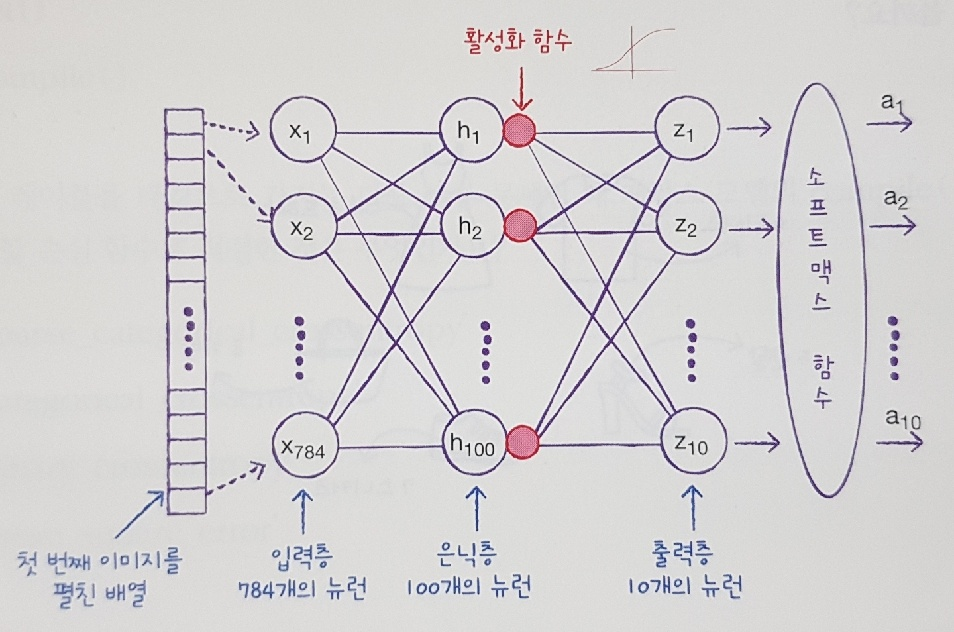

## 심층 신경망 만들기

In [4]:
# dense1과 dense2 객체를 Sequential 클래스에 추가하여 심층 신경망(DNN)을 만든다.
model = keras.Sequential([dense1, dense2])

In [6]:
model.summary()
# 케라스는 모델의 summary() 메서드를 호출하면 층에 대한 유용한 정보를 얻을 수 있다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


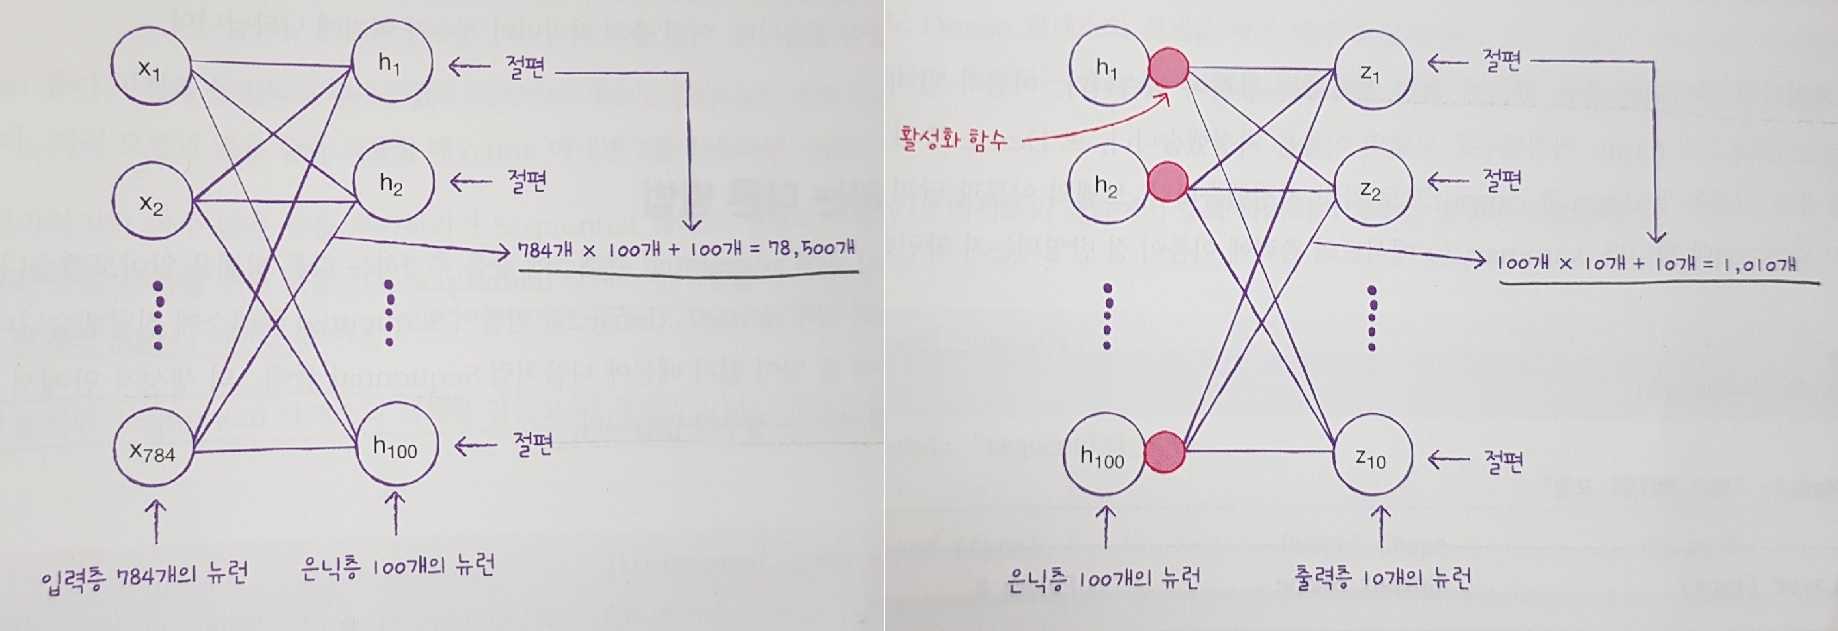

## 층을 추가하는 다른 방법

In [7]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')
# Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만듦. 이렇게 작업하면 층을 한눈에 쉽게 알아보는 장점

model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
# Sequential 클래스의 객체를 만들고, 이 객체의 add() 메서드를 호출하여 층을 추가함.

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)
# 추가된 층이 성능을 향상시켰음을 확인할 수 있음.

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5648 - accuracy: 0.8065
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4081 - accuracy: 0.8525
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3735 - accuracy: 0.8650
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3509 - accuracy: 0.8724
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3336 - accuracy: 0.8784


## 렐루 함수
렐루 함수는 이미지 분류 모델의 은닉층에 많이 사용하는 활성화 함수이다. 시그모이드 함수는 층이 많을수록 활성화 함수의 양쪽 끝에서 변화가 작기 때문에 학습이 어려워진다. 렐루 함수는 이런 문제가 없으며 계산도 간단하다.

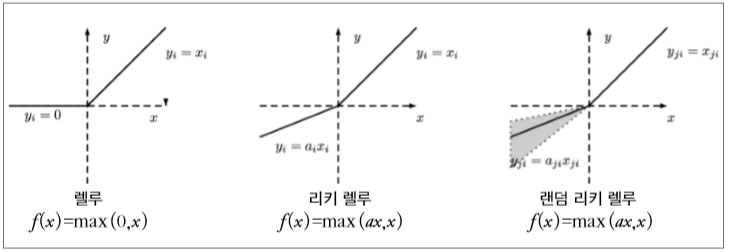

In [10]:
# Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 한다.
# 또한 케라스의 Flatten 층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있음 (784개의 입력이 첫 번째 은닉층에 전달)
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5295 - accuracy: 0.8136
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3892 - accuracy: 0.8612
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3534 - accuracy: 0.8753
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3323 - accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3179 - accuracy: 0.8859


In [13]:
model.evaluate(val_scaled, val_target)  # 검증 세트에서의 성능

375/375 [==============================] - 1s 2ms/step - loss: 0.3516 - accuracy: 0.8791


[0.3515569567680359, 0.8790833353996277]

## 옵티마이저
신경망의 가중치와 절편을 학습하기 위한 알고리즘 또는 방법을 말한다. 케라스에는 다양한 경사 하강법 알고리즘이 구현되어 있다. 대표적으로 SGD, 네스테로프 모멘텀, RMSprop, Adam 등이 있다.

In [14]:
# 여기에서는 Adam 클래스의 매개변수 기본값을 사용해 패션 MNIST 모델을 훈련한다.
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5240 - accuracy: 0.8181
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3949 - accuracy: 0.8596
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3514 - accuracy: 0.8729
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3233 - accuracy: 0.8814
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3055 - accuracy: 0.8875


In [16]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8765


[0.3359856903553009, 0.8765000104904175]